In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# При значение инсулина равным 0 состояние организма является смертельным, следовательно, примим за то, что
# данные были взяты некорректно и уберет строки с 0 показателем инсулина

df = df[df["Insulin"] != 0]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Во время беременности развивается физиологическая инсулинорезистентность. Что такое инсулинорезистентность?

# У нас в организме есть поджелудочная железа. 
# В ответ на повышение молекул глюкозы в кровотоке она вырабатывает гормон инсулин. 
# Инсулин связывается с глюкозой и «идет» к мышцам. На мышцах есть специальные рецепторы для инсулина («двери»). 
# Инсулин соединяется с рецептором и открывает «дверь», чтоб глюкоза попала в клетку, 
# где из нее будет образовываться энергия.

# Учтем, что данные для беременных (в основном), поэтому оставим следующие колонки

df = df[["Insulin", "Glucose", "DiabetesPedigreeFunction", "Pregnancies", "Age", "Outcome"]]
df

,Insulin,Glucose,DiabetesPedigreeFunction,Pregnancies,Age,Outcome
3,94,89,0.167,1,21,0
4,168,137,2.288,0,33,1
6,88,78,0.248,3,26,1
8,543,197,0.158,2,53,1
13,846,189,0.398,1,59,1
...,...,...,...,...,...,...
753,510,181,0.222,0,26,1
755,110,128,1.057,1,37,1
760,16,88,0.766,2,22,0
763,180,101,0.171,10,63,0


In [7]:
insulin = {k: len(df[df["Insulin"] == k]) for k in df["Insulin"].unique()}
insulin

{np.int64(94): 7,
 np.int64(168): 4,
 np.int64(88): 4,
 np.int64(543): 1,
 np.int64(846): 1,
 np.int64(175): 3,
 np.int64(230): 2,
 np.int64(83): 3,
 np.int64(96): 2,
 np.int64(235): 1,
 np.int64(146): 1,
 np.int64(115): 6,
 np.int64(140): 9,
 np.int64(110): 6,
 np.int64(245): 1,
 np.int64(54): 4,
 np.int64(192): 2,
 np.int64(207): 2,
 np.int64(70): 3,
 np.int64(240): 2,
 np.int64(82): 3,
 np.int64(36): 3,
 np.int64(23): 2,
 np.int64(300): 1,
 np.int64(342): 1,
 np.int64(304): 1,
 np.int64(142): 1,
 np.int64(128): 1,
 np.int64(38): 1,
 np.int64(100): 7,
 np.int64(90): 4,
 np.int64(270): 1,
 np.int64(71): 4,
 np.int64(125): 4,
 np.int64(176): 3,
 np.int64(48): 3,
 np.int64(64): 4,
 np.int64(228): 1,
 np.int64(76): 5,
 np.int64(220): 2,
 np.int64(40): 2,
 np.int64(152): 2,
 np.int64(18): 2,
 np.int64(135): 6,
 np.int64(495): 2,
 np.int64(37): 2,
 np.int64(51): 1,
 np.int64(99): 2,
 np.int64(145): 3,
 np.int64(225): 2,
 np.int64(49): 5,
 np.int64(50): 3,
 np.int64(92): 3,
 np.int64(325): 

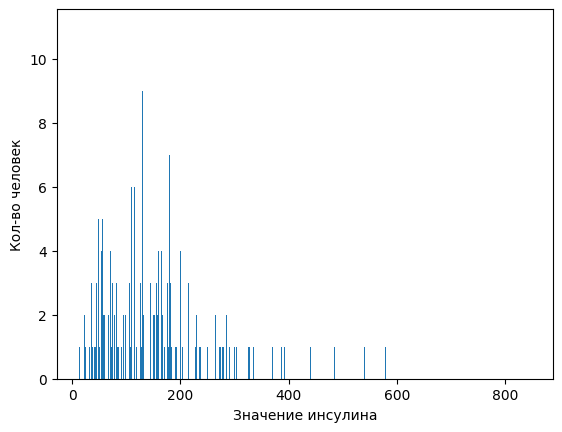

In [8]:
plt.bar(
	insulin.keys(),
	insulin.values(),
)
plt.xlabel("Значение инсулина")
plt.ylabel("Кол-во человек")
plt.show()

In [9]:
x, y = df[["Insulin", "Glucose", "DiabetesPedigreeFunction", "Pregnancies", "Age"]], df["Outcome"]

LogisticRegression_model = LogisticRegression(max_iter=1000).fit(x, y)
print(
	LogisticRegression_model.coef_,
	LogisticRegression_model.intercept_[0]
)

[[1.47766157e-04 3.76721240e-02 9.69622420e-01 5.89725898e-02
  3.64988247e-02]] -7.4104476833558595


In [10]:
def f(x):
	f_ = LogisticRegression_model.intercept_[0]
	coef = LogisticRegression_model.coef_[0]
	for i in range(len(coef)):
		f_ += coef[i] * x
	
	return f_

In [11]:
x_model = np.linspace(-100, 400, 1000)
f_ = f(x_model)

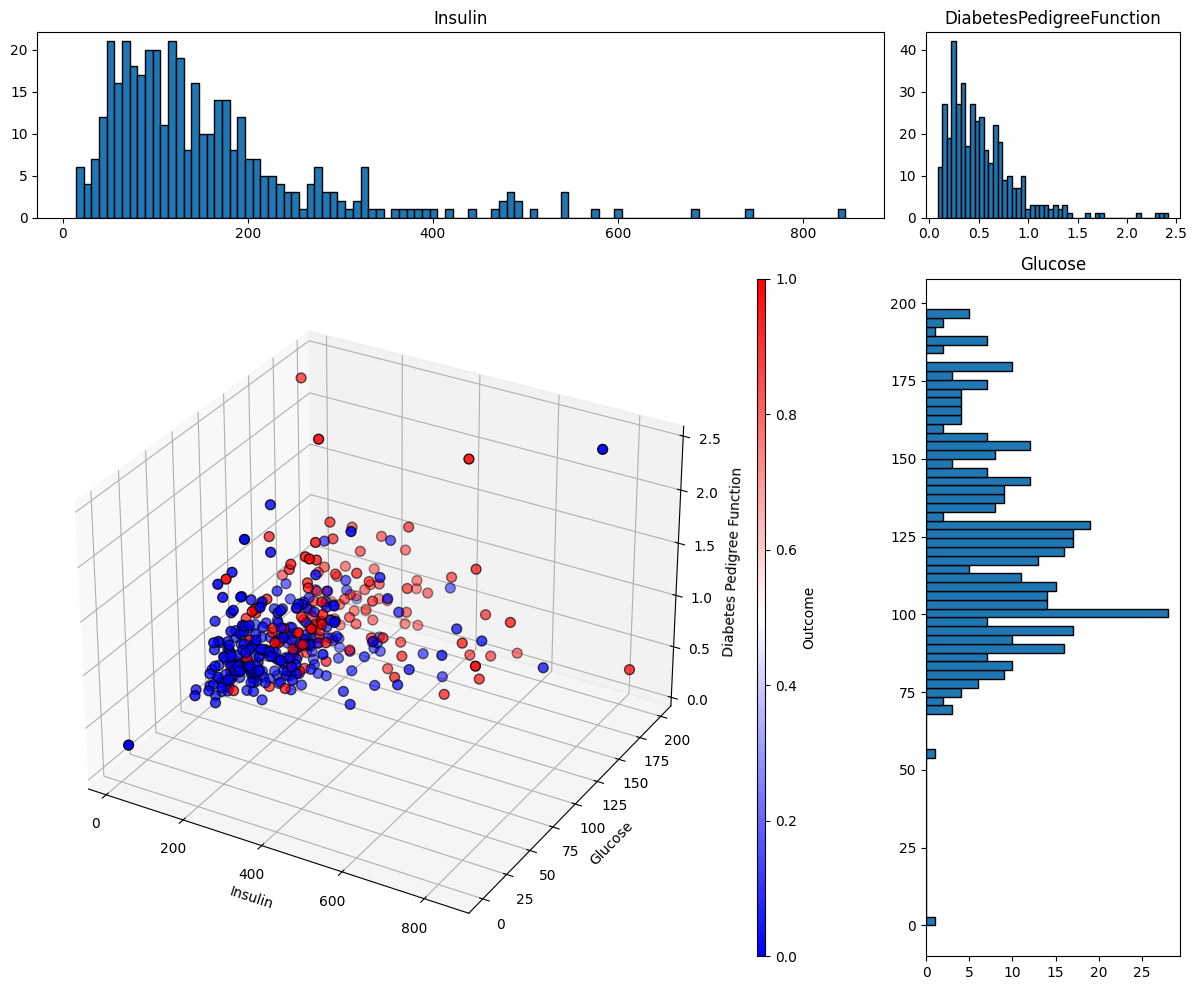

In [12]:
fig = plt.figure(figsize=(12, 10))
grid = plt.GridSpec(8, 8)

ax_up = fig.add_subplot(grid[2:8, :6], projection="3d")

ax = fig.add_subplot(grid[:2, :6])
ay = fig.add_subplot(grid[2:8, 6:8])
az = fig.add_subplot(grid[:2, 6:8])

Insulin = df["Insulin"]
Glucose = df["Glucose"] 
DiabetesPedigreeFunction = df["DiabetesPedigreeFunction"]
Outcome = df["Outcome"]

scatter = ax_up.scatter(Insulin, Glucose, DiabetesPedigreeFunction, c=Outcome, cmap="bwr", ec="k", s=50, zorder=3)

ax_up.set_xlabel("Insulin")
ax_up.set_ylabel("Glucose")
ax_up.set_zlabel("Diabetes Pedigree Function")

ax.hist(Insulin, bins=100, edgecolor="k")
ax.set_title("Insulin")

ay.hist(Glucose, bins=70, orientation="horizontal", edgecolor="k")
ay.set_title("Glucose")

az.hist(DiabetesPedigreeFunction, bins=50, edgecolor="k")
az.set_title("DiabetesPedigreeFunction")

colorbar = fig.colorbar(scatter, ax=ax_up, aspect=80)
colorbar.set_label("Outcome")

plt.tight_layout()
plt.show()

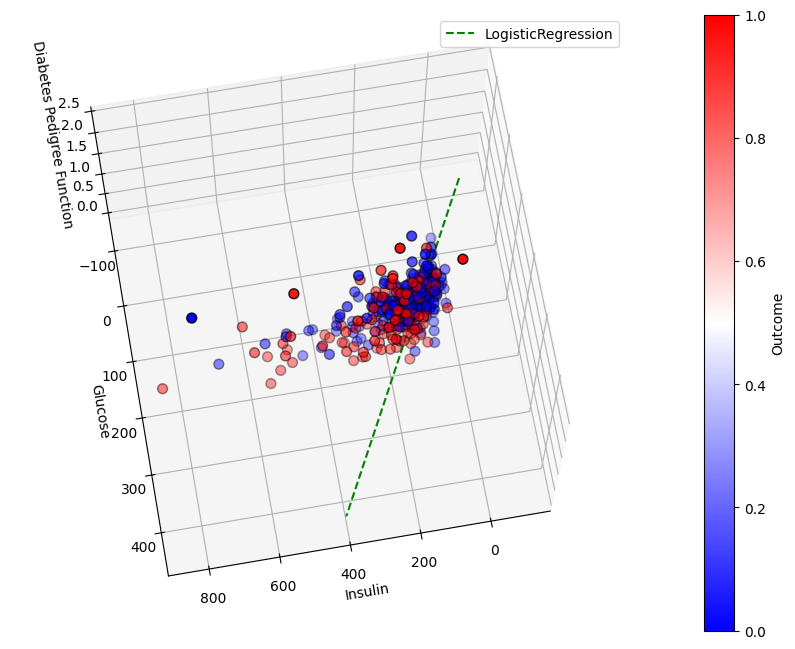

In [13]:
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(projection="3d")
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw={"projection": "3d"})

scatter = ax.scatter(
	df["Insulin"], 
	df["Glucose"], 
	df["DiabetesPedigreeFunction"],
	s=50,
	c=df["Outcome"], 
	ec="k",
	cmap="bwr",
	zorder=3
)

ax.plot(
	x_model, 
	f_, 
	c="g",
	ls="--",
	label="LogisticRegression"
)


ax.view_init(
	elev=70,
	azim=80,
)

ax.set_xlabel("Insulin")
ax.set_ylabel("Glucose")
ax.set_zlabel("Diabetes Pedigree Function")
ax.legend()

fig.colorbar(scatter, ax=ax, label="Outcome")

plt.show()

In [14]:
def f(x, model: LogisticRegression):
	intercept = model.intercept_[0]
	coef = model.coef_[0]
	f_ = intercept
	for i in range(len(coef)):
		f_ += coef[i] * x
	
	return intercept, coef, f_

In [15]:
x_model = np.linspace(-100, 400, 1000)

0.8
0.8333333333333334


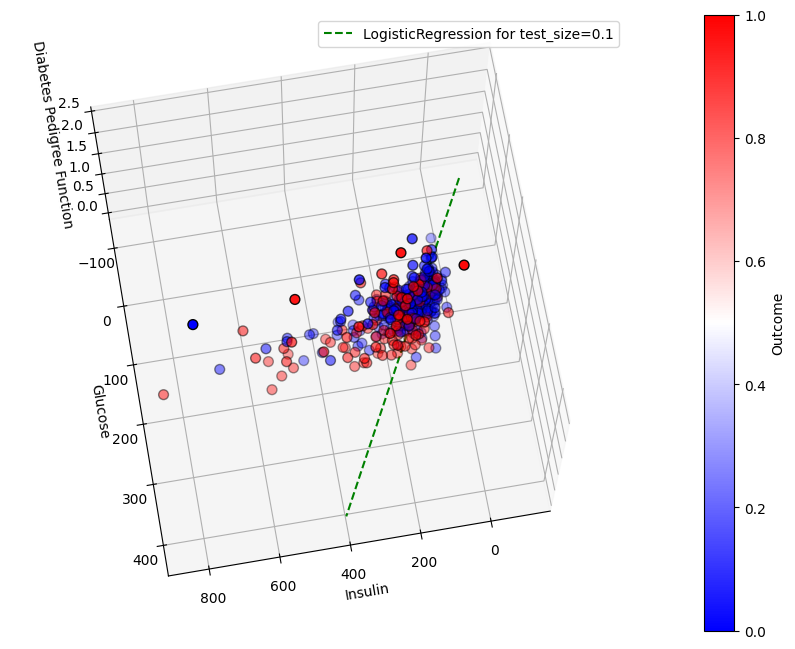

0.810126582278481
0.75


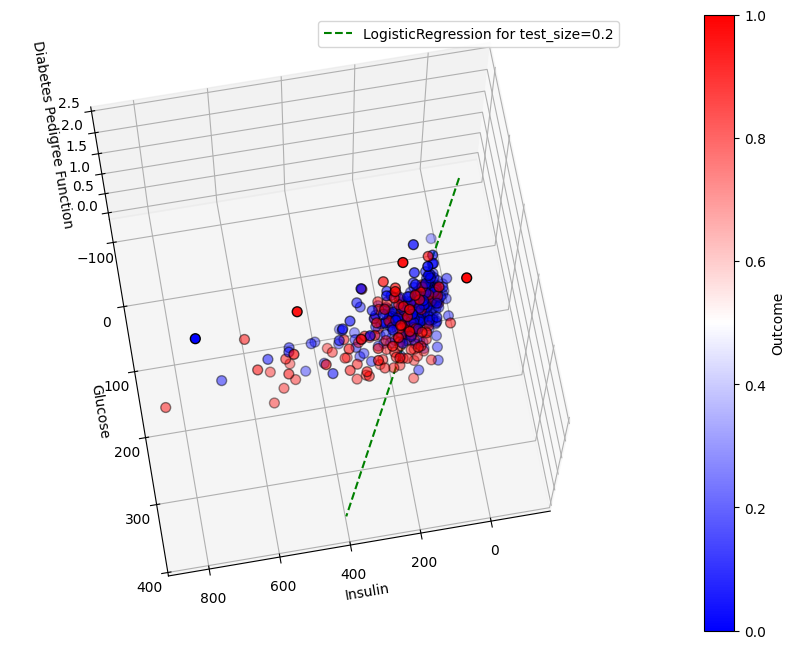

0.8151260504201681
0.7586206896551724


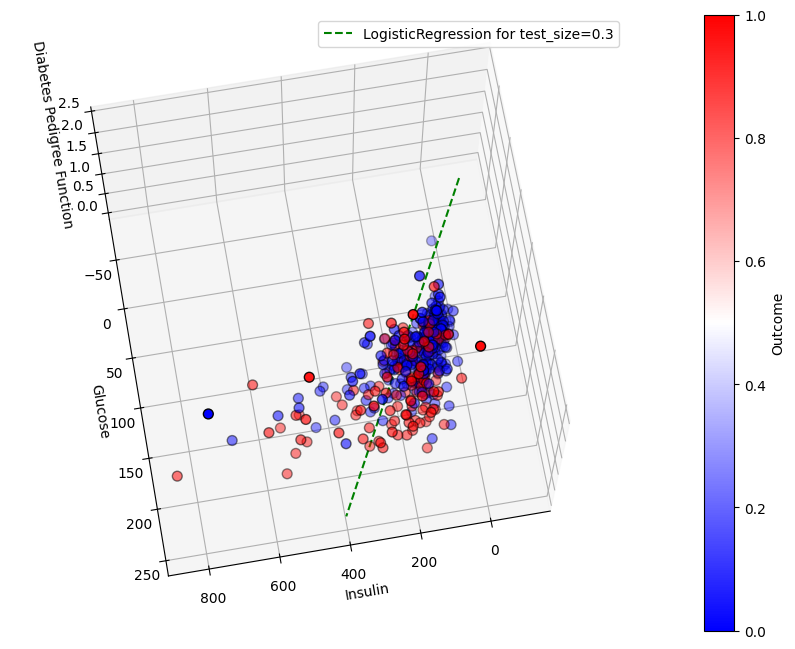

0.8037974683544303
0.725


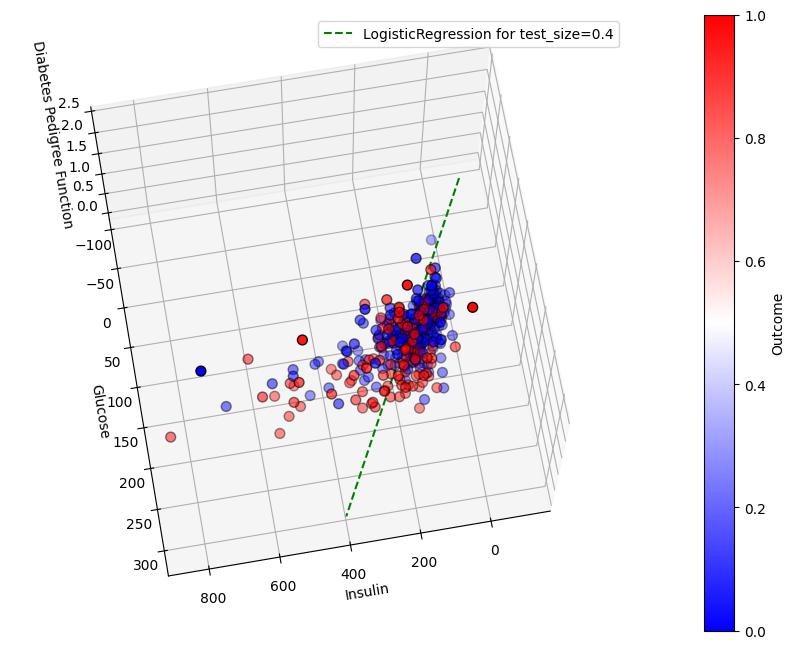

0.7766497461928934
0.7333333333333333


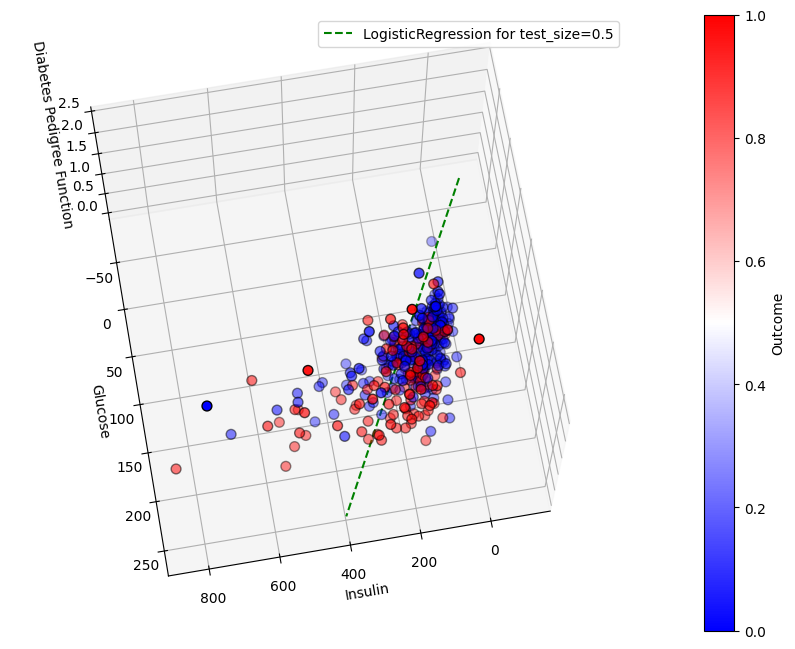

0.7763713080168776
0.7192982456140351


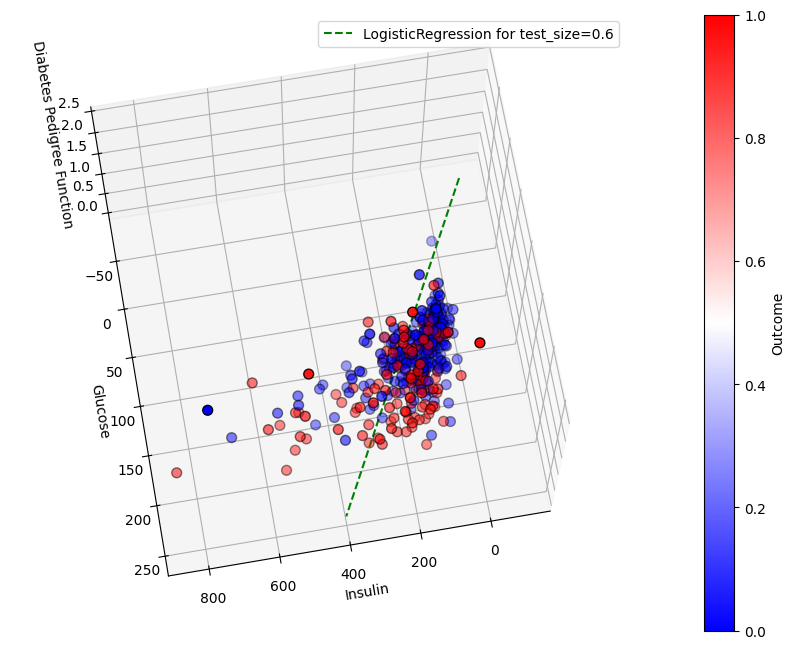

0.7608695652173914
0.7096774193548387


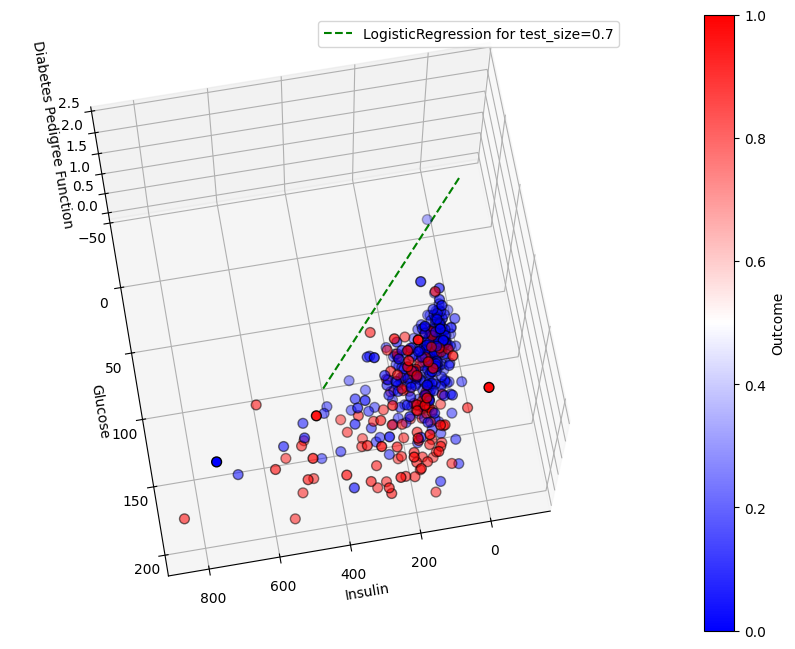

0.7784810126582279
0.7910447761194029


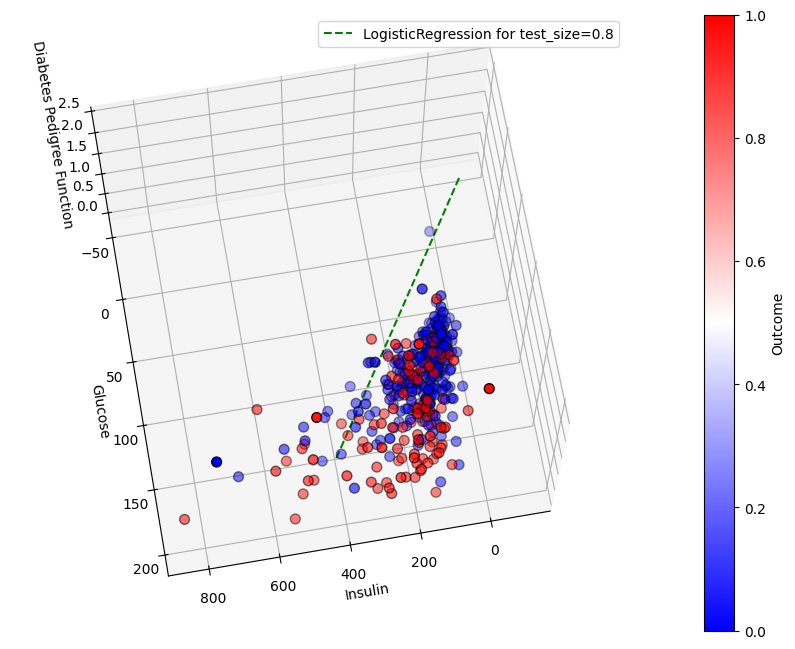

0.7577464788732394
0.7571428571428571


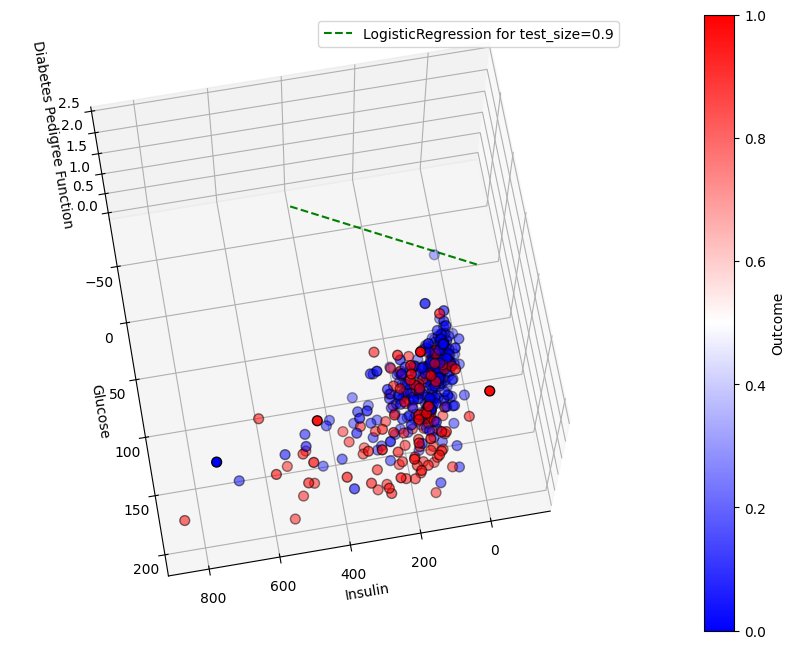

In [16]:
test_sizes = {
	"test_size": [],
	"accuracy": [],
	"precision": [],
	"coef": []
}

for test_procent in range(1, 10):
	test_size = float(f".{test_procent}")
	x_train, x_test, y_train, y_test = train_test_split(
		x,
		y,
		test_size=test_size,
		random_state=42
	)
	
	LogisticRegression_model = LogisticRegression(max_iter=1000).fit(x_train, y_train)
	y_pred = LogisticRegression_model.predict(x_test)
	intercept, coef, f_ = f(x_model, LogisticRegression_model)

	test_sizes["test_size"] += [test_size]
	test_sizes["accuracy"] += [accuracy_score(y_test, y_pred)]
	test_sizes["precision"] += [precision_score(y_test, y_pred)]
	test_sizes["coef"] += [abs(coef)]

	print(accuracy_score(y_test, y_pred))
	print(precision_score(y_test, y_pred))

	fig, ax = plt.subplots(figsize=(20, 8), subplot_kw={"projection": "3d"})

	scatter = ax.scatter(
		df["Insulin"], 
		df["Glucose"], 
		df["DiabetesPedigreeFunction"],
		s=50,
		c=df["Outcome"], 
		ec="k",
		cmap="bwr",
		zorder=3
	)
	
	ax.plot(
		x_model, 
		f_, 
		c="g",
		ls="--",
		label=f"LogisticRegression for test_size={test_size}"
	)


	ax.view_init(
		elev=70,
		azim=80,
	)

	ax.set_xlabel("Insulin")
	ax.set_ylabel("Glucose")
	ax.set_zlabel("Diabetes Pedigree Function")
	ax.legend()

	fig.colorbar(scatter, ax=ax, label="Outcome")

	plt.show()

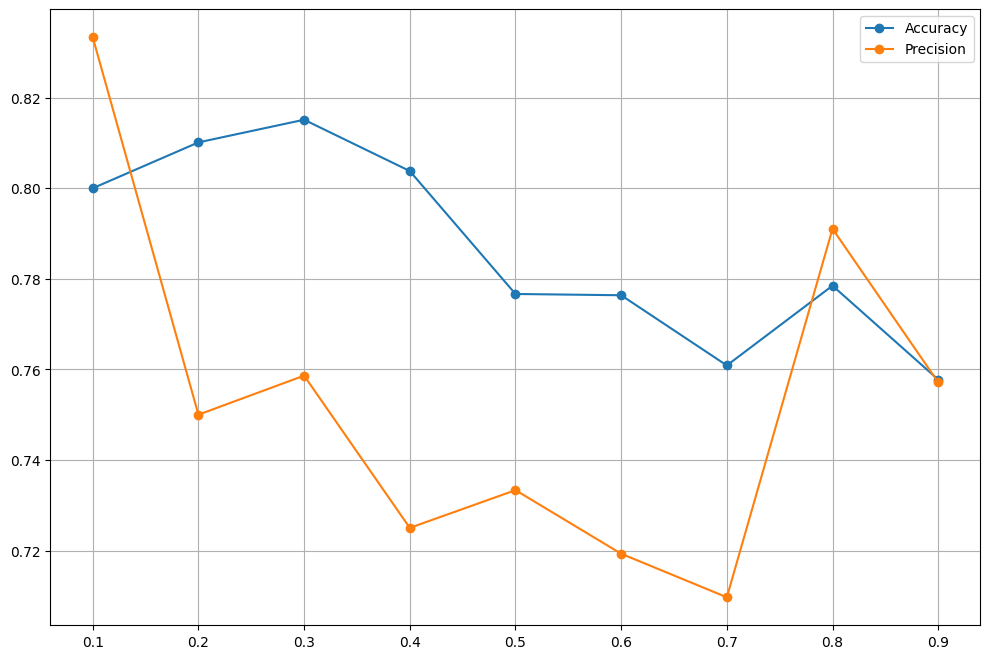

In [17]:
plt.subplots(figsize=(12, 8))

plt.plot(test_sizes["test_size"], test_sizes["accuracy"], "o-", label="Accuracy")
plt.plot(test_sizes["test_size"], test_sizes["precision"], "o-", label="Precision")

plt.legend()
plt.grid()

plt.show()

[1.31354279e-04 3.77132488e-02 8.90880909e-01 8.77671449e-02
 3.04966684e-02]


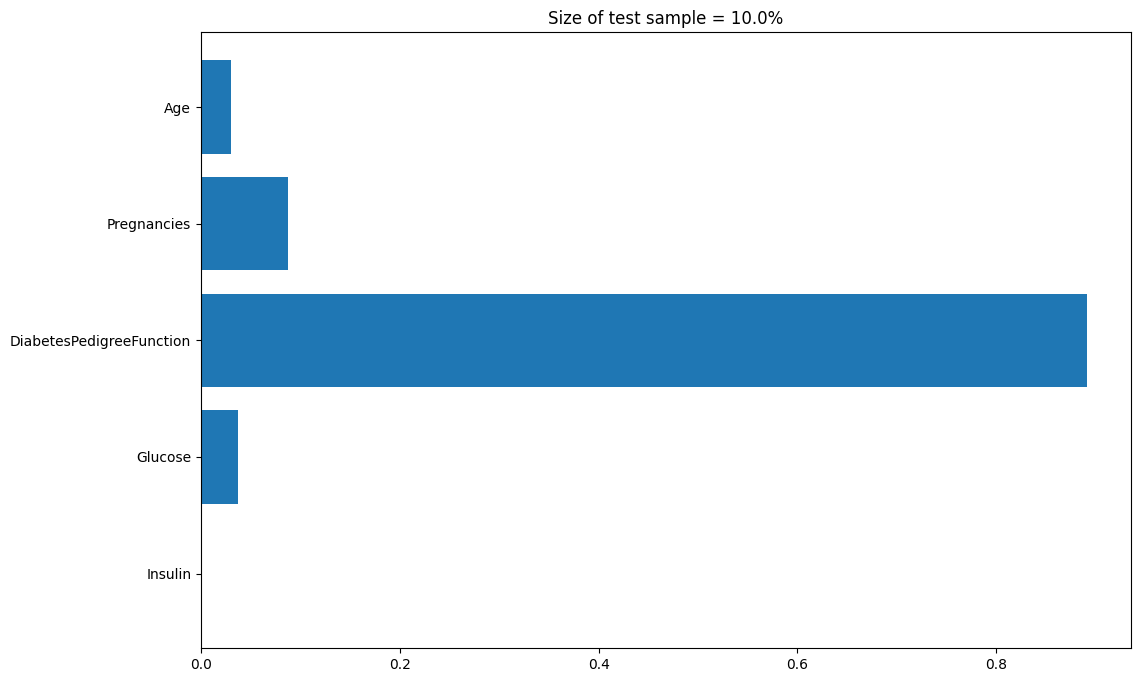

[9.97439437e-05 3.76632310e-02 7.73268807e-01 1.01560212e-01
 3.23250115e-02]


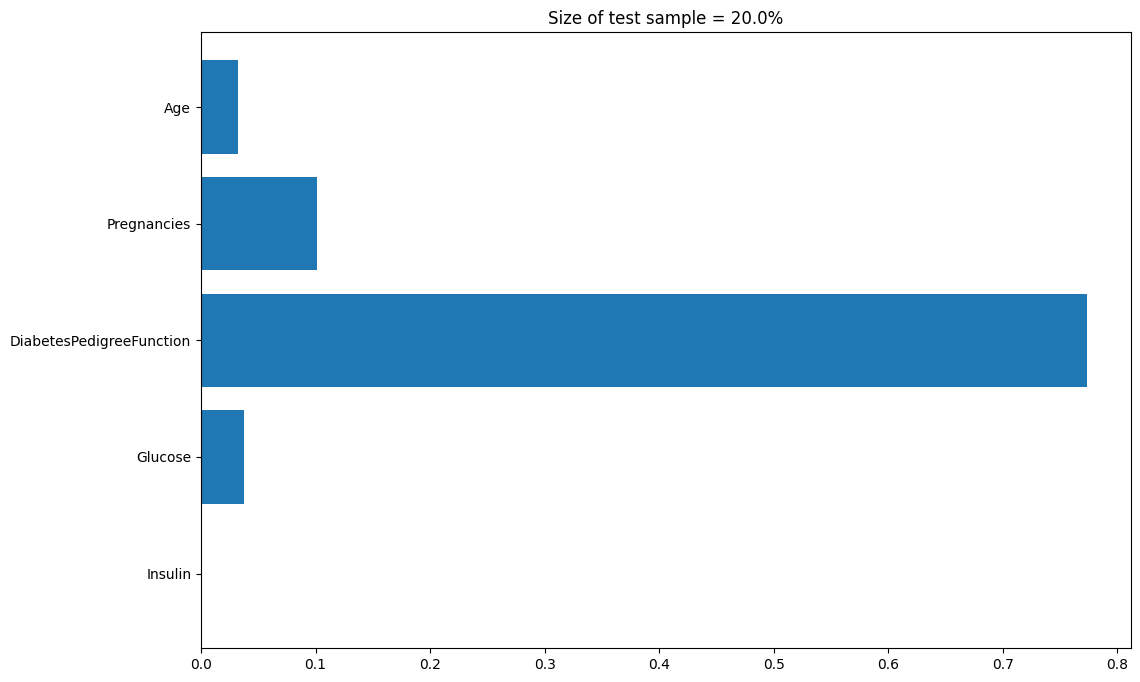

[2.32366112e-04 3.53814574e-02 4.48986141e-01 9.60485589e-02
 4.24813780e-02]


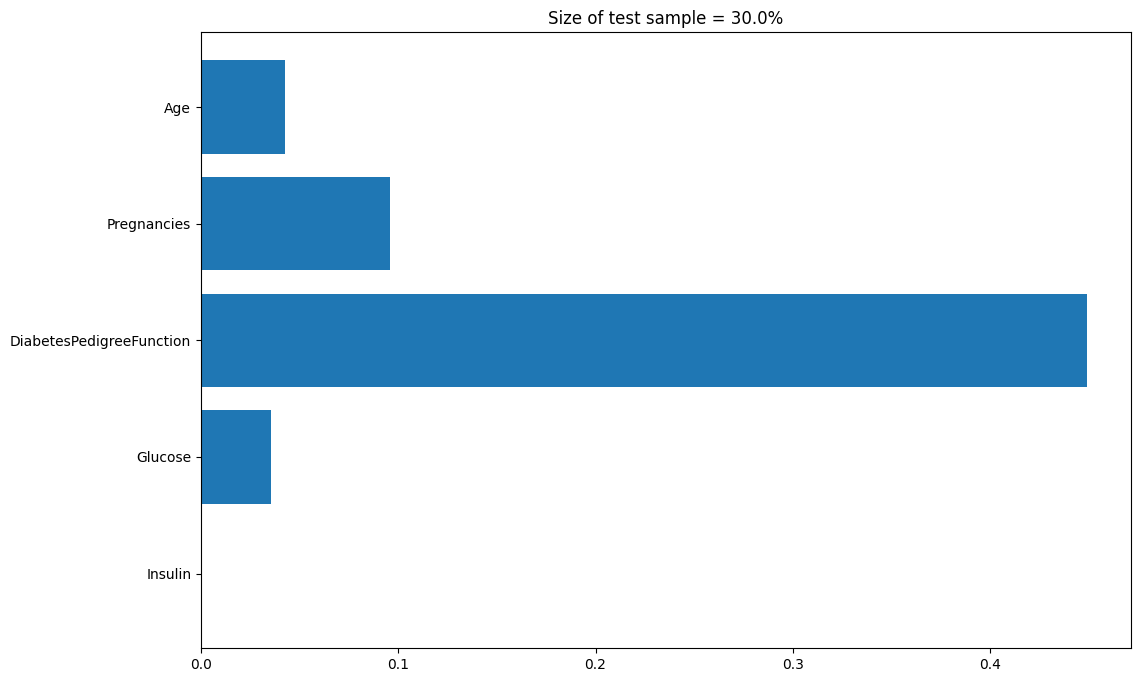

[1.22462301e-04 3.94516643e-02 6.03540199e-01 9.17398991e-02
 3.88300762e-02]


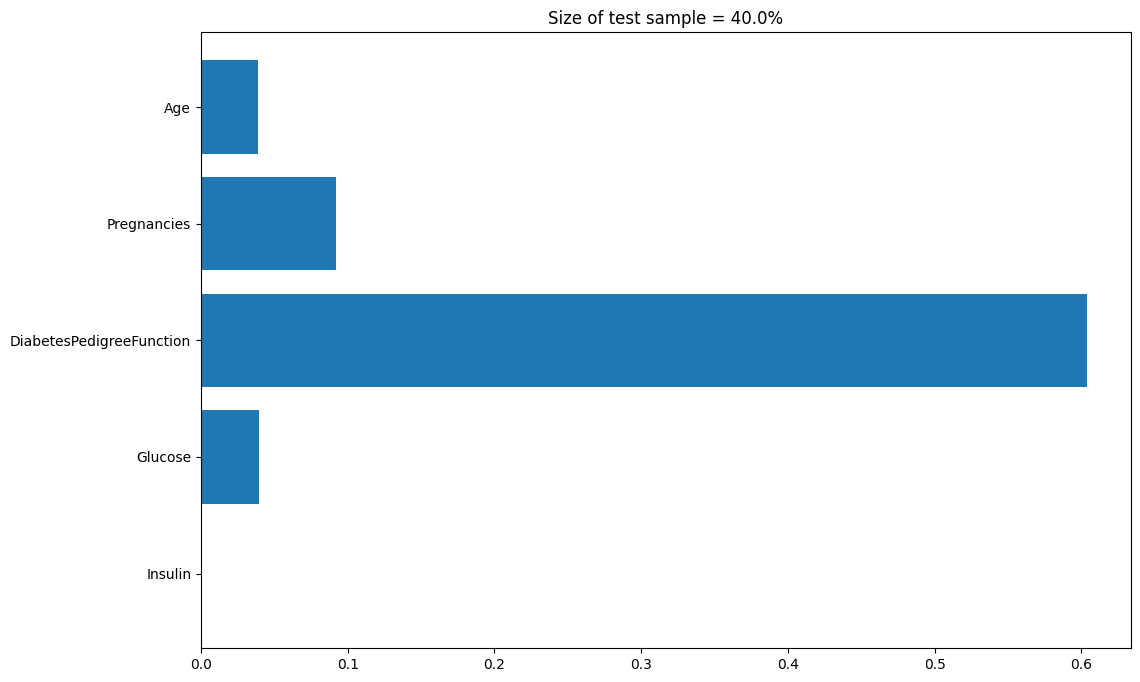

[3.95463027e-04 4.65707221e-02 5.01333223e-01 7.38588736e-02
 2.73636899e-02]


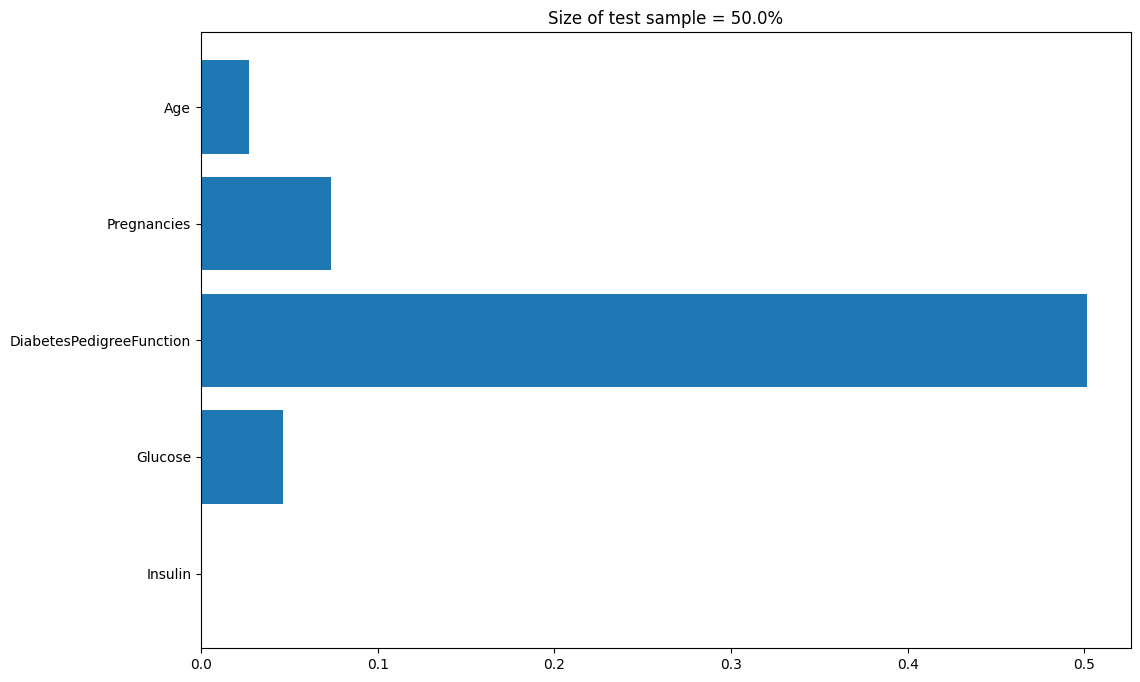

[0.00138646 0.04416686 0.48439159 0.09447256 0.01030502]


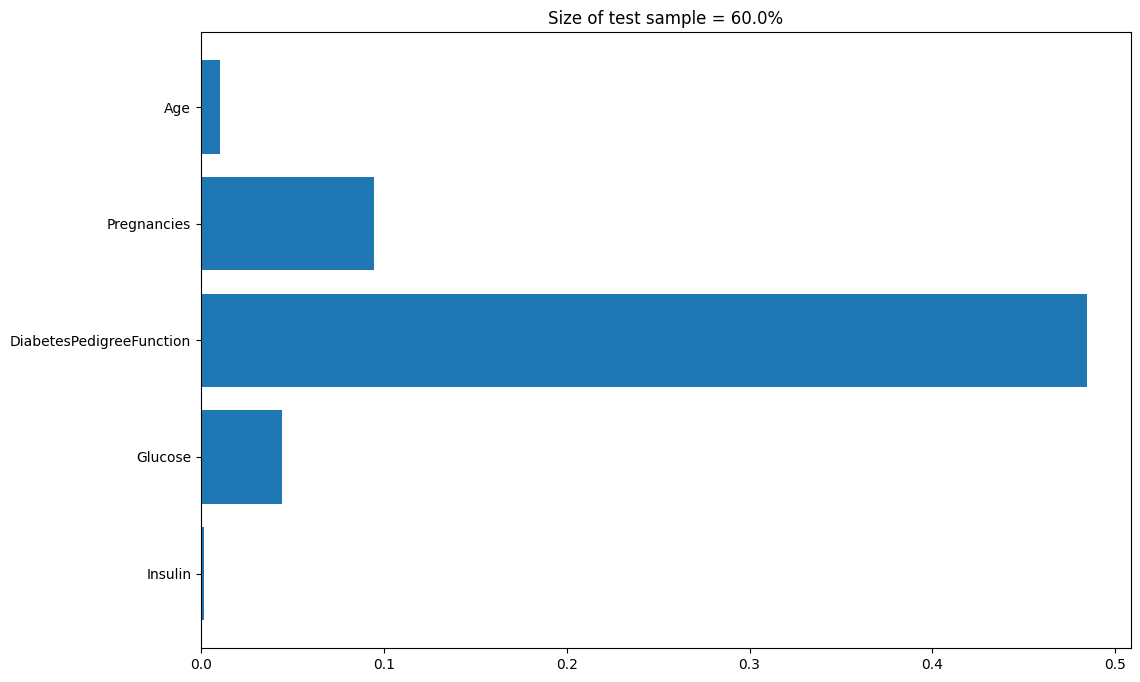

[0.00112326 0.0499908  0.1070598  0.13097088 0.00913423]


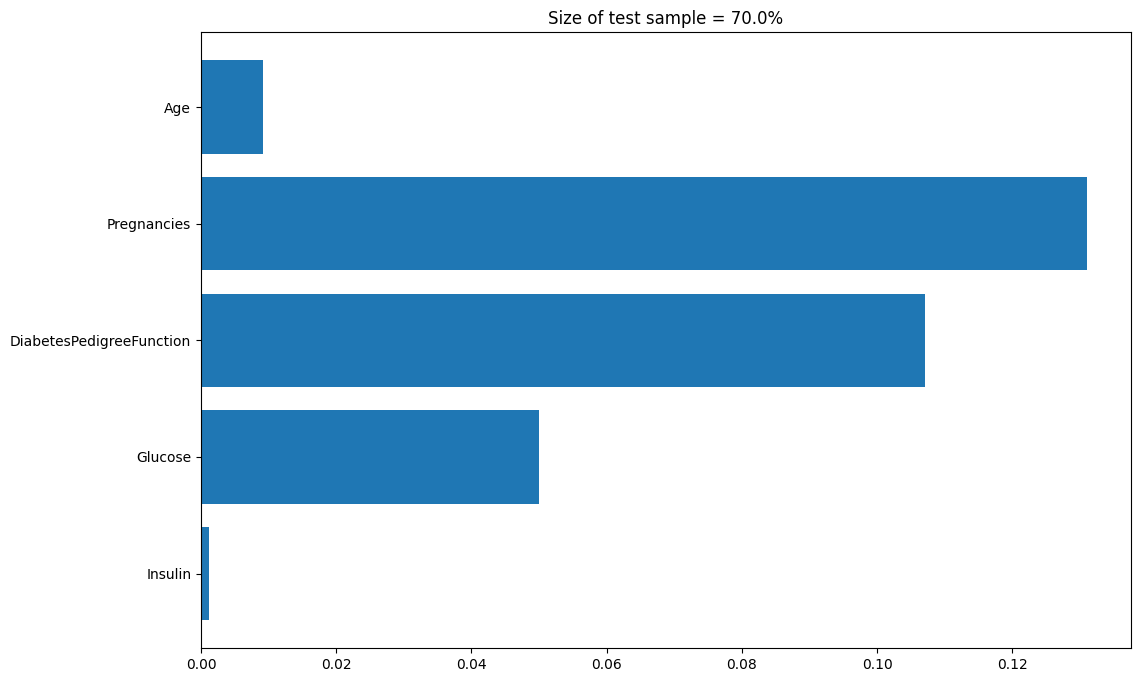

[0.00255691 0.03777021 0.22137333 0.14738145 0.00614331]


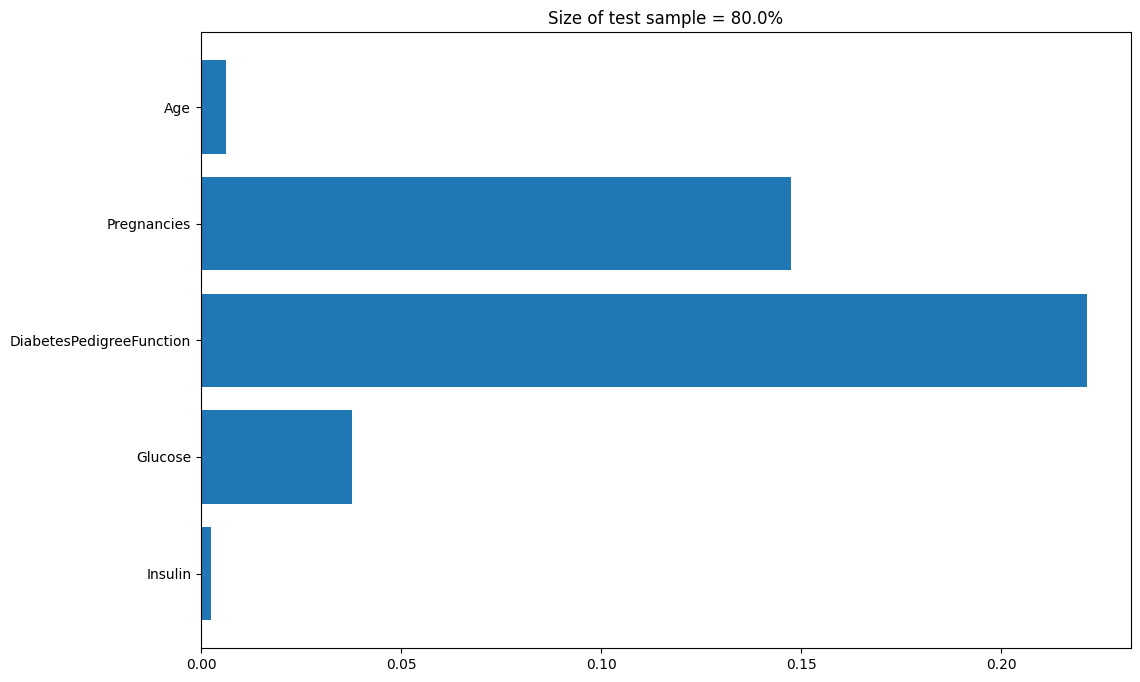

[4.18812480e-05 8.55696974e-02 5.56850118e-01 4.40538218e-01
 1.24617474e-01]


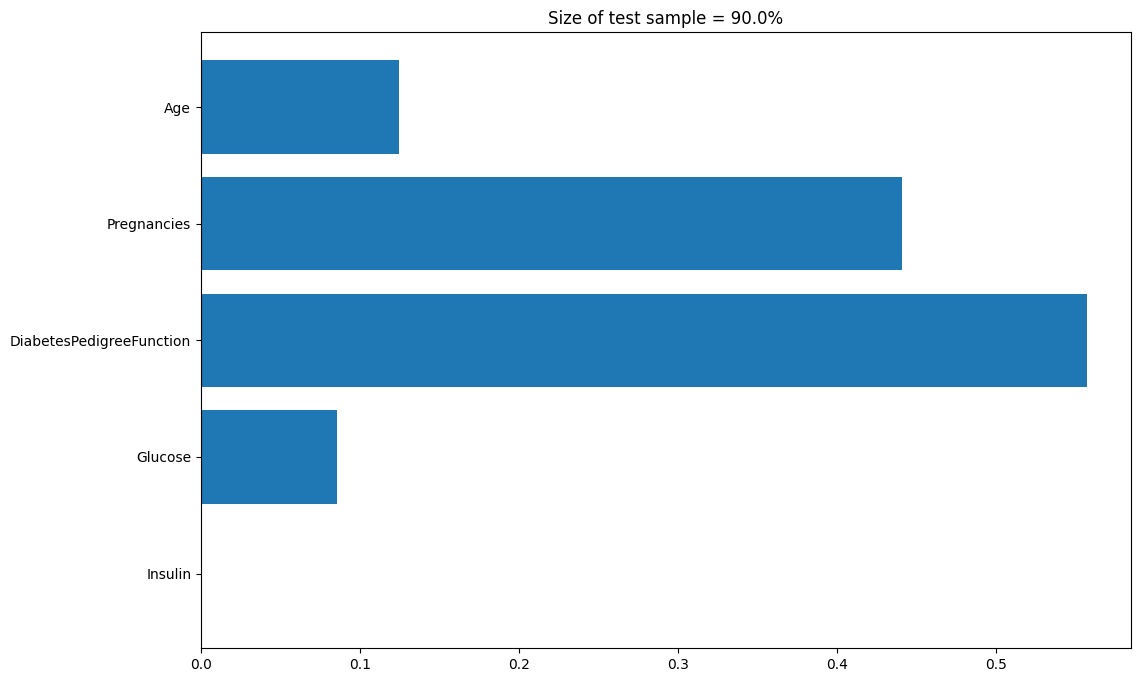

In [18]:
features = df.columns.to_list()[:-1]

for i in range(len(test_sizes["coef"])):
	print(test_sizes["coef"][i])
	plt.subplots(figsize=(12, 8))
	plt.title(f"Size of test sample = {test_sizes["test_size"][i] * 100}%")
	plt.barh(features, test_sizes["coef"][i])

	plt.show()
